# Animación de Curvas Parametrizadas 3D
#### Este cuaderno es una herramienta para crear en 4 simples pasos animaciones de gráficas tridimensionales de curvas parametrizadas desde el navegador utilizando Python.

Instrucciones:
Cada paso consta de un bloque de codigo que debe ser ejecutado. Para ejecutar dar click en el boton circular a la izquierda dentro del bloque de codigo (aparece al poner el cursor sobre el codigo).

In [1]:
# EJECUTAR ANTES
# Importamos las librerías necesarias:
import numpy as np # permite trabajar con matrices y vectores
import matplotlib.pyplot as plt # gráficos
from mpl_toolkits.mplot3d import Axes3D # más gráficos
from matplotlib.animation import FuncAnimation # animaciones
from sympy import * # álgebra



---



---



## Paso 1: Introducir la función:
Ingresa la parametrización de la función y el dominio de t.

In [2]:
# Función paramétrica para la curva
def parametric_curve(t):
  r1 = 2 #constantes
  r2 = 1

  x = (r1 + r2 * np.cos(t)) * np.cos(t)
  y = (r1 + r2 * np.cos(t)) * np.sin(t)
  z = r2 * np.sin(t)
  return x, y, z

# Rango de valores de parámetro t
t = np.linspace(0, 2*np.pi, 100)



---



---



## Paso 2: Crear el espacio:
En este paso "crearemos" el espacio donde habitará nuestra función. Inicialmente estará vacio.
También creamos lineas que representan los ejes.

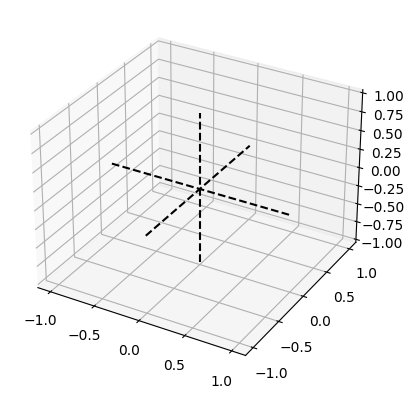

In [3]:
# Configuración de la figura y el gráfico en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar ejes
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linestyle='--')  # Eje X
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linestyle='--')  # Eje Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linestyle='--')  # Eje Z



---



---




## Paso 3: Animación:
Esta parte contiene el codigo necesario para la animación.
Además se puede controlar la rotación y elevación del gráfico, la duración de la animación y la **sección del espacio que queremos mostrar**.

In [4]:
# Función de actualización para la animación
def update_frame(i):
    ax.cla()  # Limpiar el gráfico antes de cada cuadro

    # Rotar el gráfico (azim=i rota en la animación)
    ax.view_init(elev=20, azim=i)

    # Definir sección del espacio mostrada
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(0, 2*np.pi)

    # Nombrar los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    # Ajustar la escala de los ejes
    ax.set_box_aspect([1, 1, 1])

    # Calcular los puntos de la curva en el cuadro actual
    index = min(i, len(t) - 1)  # Asegurar que el índice esté dentro de los límites de t
    x, y, z = parametric_curve(t[:index+1])

    # Graficar la curva en 3D
    ax.plot(x, y, z, color='red')

    # Mostrar el valor de t en el gráfico
    ax.text2D(0.05, 0.95, f"t = {t[index]:.2f}", transform=ax.transAxes)

# Crear la animación:
# La variable duracion controla la duración (en frames) de la animación después de dibujada la curva
duracion = 200
animation = FuncAnimation(fig, update_frame, frames=len(t) + duracion, interval=50)



---



---



## Paso 4: Producir la animación: 🎉🥳
Este ultimo paso puede tardar unos segundos.

In [5]:
# Mostrar la animación
from IPython.display import HTML
HTML(animation.to_html5_video())

Autor: Guillermo Andrés Arboleda

gaarboledag@ut.edu.co



---



---



# Parte 2: Animación del trihedro de frenet 3D:

Esta parte de codigo reemplaza al Paso 3. Se añade la aproximación de la derivada de la función y los vectores e1, e2, e3.

In [ ]:
def update_frame(i):
    ax.cla()  # Limpiar el gráfico antes de cada cuadro

    # Rotar el gráfico (azim=i rota en la animación)
    ax.view_init(elev=20, azim=i)

    # Definir sección del espacio mostrada
    ax.set_xlim(-2*np.pi,2*np.pi)
    ax.set_ylim(-2*np.pi,2*np.pi)
    ax.set_zlim(0, 2*np.pi)

    # Ajustar la escala de los ejes
    ax.set_box_aspect([1, 1, 1])

    # Nombrar los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    # Calcular los puntos de la curva en el cuadro actual
    index = min(i, len(t) - 1)  # Asegurar que el índice esté dentro de los límites de t
    x, y, z = parametric_curve(t[:index+1])

    # Graficar la curva en 3D
    ax.plot(x, y, z, color='red')

    if index > 0:
        # Calcular el vector tangente en el punto actual
        dt = t[index] - t[index-1]
        dx_dt = (x[index] - x[index-1]) / dt
        dy_dt = (y[index] - y[index-1]) / dt
        dz_dt = (z[index] - z[index-1]) / dt
        tangent = np.array([dx_dt, dy_dt, dz_dt])
        tangent /= np.linalg.norm(tangent)  # Normalizar el vector tangente

        # Calcular el vector normal en el punto actual
        d2t_dt2 = (t[index] - 2*t[index-1] + t[index-2]) / (dt**2)
        d2x_dt2 = (x[index] - 2*x[index-1] + x[index-2]) / (dt**2)
        d2y_dt2 = (y[index] - 2*y[index-1] + y[index-2]) / (dt**2)
        d2z_dt2 = (z[index] - 2*z[index-1] + z[index-2]) / (dt**2)
        normal = np.array([d2x_dt2, d2y_dt2, d2z_dt2])
        normal /= np.linalg.norm(normal)  # Normalizar el vector normal

        # Calcular el vector e3
        e3 = np.cross(tangent, normal)

        # Graficar el vector tangente normalizado
        ax.quiver(x[-1], y[-1], z[-1], tangent[0], tangent[1], tangent[2], color='blue')

        # Graficar el vector normal normalizado
        ax.quiver(x[-1], y[-1], z[-1], normal[0], normal[1], normal[2], color='green')

        # Graficar el vector e3
        ax.quiver(x[-1], y[-1], z[-1], e3[0], e3[1], e3[2], color='purple')

    # Mostrar el valor de t en el gráfico
    ax.text2D(0.05, 0.95, f"t = {t[index]:.2f}", transform=ax.transAxes)

# Crear la animación:
# La variable duracion controla la duración (en frames) de la animación después de dibujada la curva
duracion = 200
animation = FuncAnimation(fig, update_frame, frames=len(t) + duracion, interval=50)

In [ ]:
# Mostrar la animación
from IPython.display import HTML
HTML(animation.to_html5_video())